# Housing Price Predictions with Melbourne

In [195]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# Gathering and Observing Data

In [196]:
data = pd.read_csv("Melbourne_housing_FULL.csv")
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [197]:
data.shape

(34857, 21)

In [198]:
len(data.columns)

21

In [199]:
data.size

731997

In [200]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [201]:
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [202]:
data.memory_usage().sum()

5856104

In [203]:
data.index

RangeIndex(start=0, stop=34857, step=1)

In [204]:
data.count()

Suburb           34857
Address          34857
Rooms            34857
Type             34857
Price            27247
Method           34857
SellerG          34857
Date             34857
Distance         34856
Postcode         34856
Bedroom2         26640
Bathroom         26631
Car              26129
Landsize         23047
BuildingArea     13742
YearBuilt        15551
CouncilArea      34854
Lattitude        26881
Longtitude       26881
Regionname       34854
Propertycount    34854
dtype: int64

In [205]:
data.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

# Exploratory Data Analysis

In [206]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [208]:
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [209]:
cat_col = data.select_dtypes(include=['object']) # Kategorik değerlere sahip olan sütunlar seçildi
cat_col.drop(columns="Date", inplace=True)
cat_col

,Suburb,Address,Type,Method,SellerG,CouncilArea,Regionname
0,Abbotsford,68 Studley St,h,SS,Jellis,Yarra City Council,Northern Metropolitan
1,Abbotsford,85 Turner St,h,S,Biggin,Yarra City Council,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,h,S,Biggin,Yarra City Council,Northern Metropolitan
3,Abbotsford,18/659 Victoria St,u,VB,Rounds,Yarra City Council,Northern Metropolitan
4,Abbotsford,5 Charles St,h,SP,Biggin,Yarra City Council,Northern Metropolitan
...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,h,PI,Jas,Maribyrnong City Council,Western Metropolitan
34853,Yarraville,29A Murray St,h,SP,Sweeney,Maribyrnong City Council,Western Metropolitan
34854,Yarraville,147A Severn St,t,S,Jas,Maribyrnong City Council,Western Metropolitan
34855,Yarraville,12/37 Stephen St,h,SP,hockingstuart,Maribyrnong City Council,Western Metropolitan


In [210]:
duplicates = data[data.duplicated(keep=False)]
duplicates

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [211]:
data.drop_duplicates(inplace=True)

In [212]:
num_col = data.drop(cat_col, axis=1) # Nümerik olan sütunları aldık
num_col.drop(columns="Date", inplace=True)
num_col

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,NaN,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,-37.80140,144.99580,4019.0
1,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,4019.0
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
3,3,NaN,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,-37.81140,145.01160,4019.0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,1480000.0,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,-37.81053,144.88467,6543.0
34853,2,888000.0,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,-37.81551,144.88826,6543.0
34854,2,705000.0,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,-37.82286,144.87856,6543.0
34855,3,1140000.0,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6543.0


In [213]:
def remove_outliers_zscore(data, threshold=3):
    """
    Veri setindeki outlier'ları Z-skor yöntemi ile belirler ve belirtilen eşik değerine göre kaldırır.
    
    Args:
    data (pandas.DataFrame): Outlier'ların tespit edileceği veri seti.
    threshold (float): Z-skor eşik değeri. Varsayılan olarak 3 kullanılır.

    Returns:
    pandas.DataFrame: Outlier'ları çıkartılmış veri seti.
    """
    z_scores = ((data - data.mean()) / data.std()).abs()
    outliers = (z_scores > threshold).any(axis=1)
    data_without_outliers = data[~outliers]
    return data_without_outliers


In [214]:
cleaned_data = remove_outliers_zscore(data, threshold=3)
cleaned_data

C:\Users\90546\AppData\Local\Temp\ipykernel_21916\3861859611.py:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = ((data - data.mean()) / data.std()).abs()
C:\Users\90546\AppData\Local\Temp\ipykernel_21916\3861859611.py:12: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = ((data - data.mean()) / data.std()).abs()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [215]:
cleaned_data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             6983
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          7644
Bathroom          7652
Car               8125
Landsize         10781
BuildingArea     19289
YearBuilt        17597
CouncilArea          3
Lattitude         7429
Longtitude        7429
Regionname           3
Propertycount        3
dtype: int64

In [216]:
cleaned_data[cat_col.columns] = cleaned_data[cat_col.columns].fillna(cleaned_data[cat_col.columns].mode().iloc[0])

C:\Users\90546\AppData\Local\Temp\ipykernel_21916\1074278580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[cat_col.columns] = cleaned_data[cat_col.columns].fillna(cleaned_data[cat_col.columns].mode().iloc[0])


In [217]:
imputer = KNNImputer(n_neighbors=5) # Mod veya medyan ile doldurmak varyansı arttırdığı için knn imputer kullandım
cleaned_data[num_col.columns] = imputer.fit_transform(cleaned_data[num_col.columns])

C:\Users\90546\AppData\Local\Temp\ipykernel_21916\3011541319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[num_col.columns] = imputer.fit_transform(cleaned_data[num_col.columns])


## Data Visualization

<AxesSubplot: xlabel='Price', ylabel='Count'>

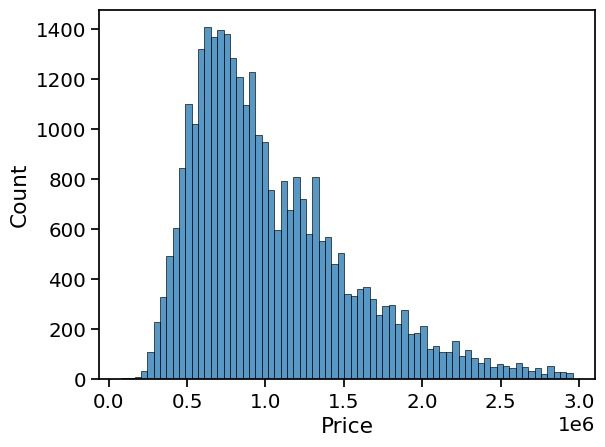

In [218]:
sns.histplot(data=cleaned_data, x = "Price")

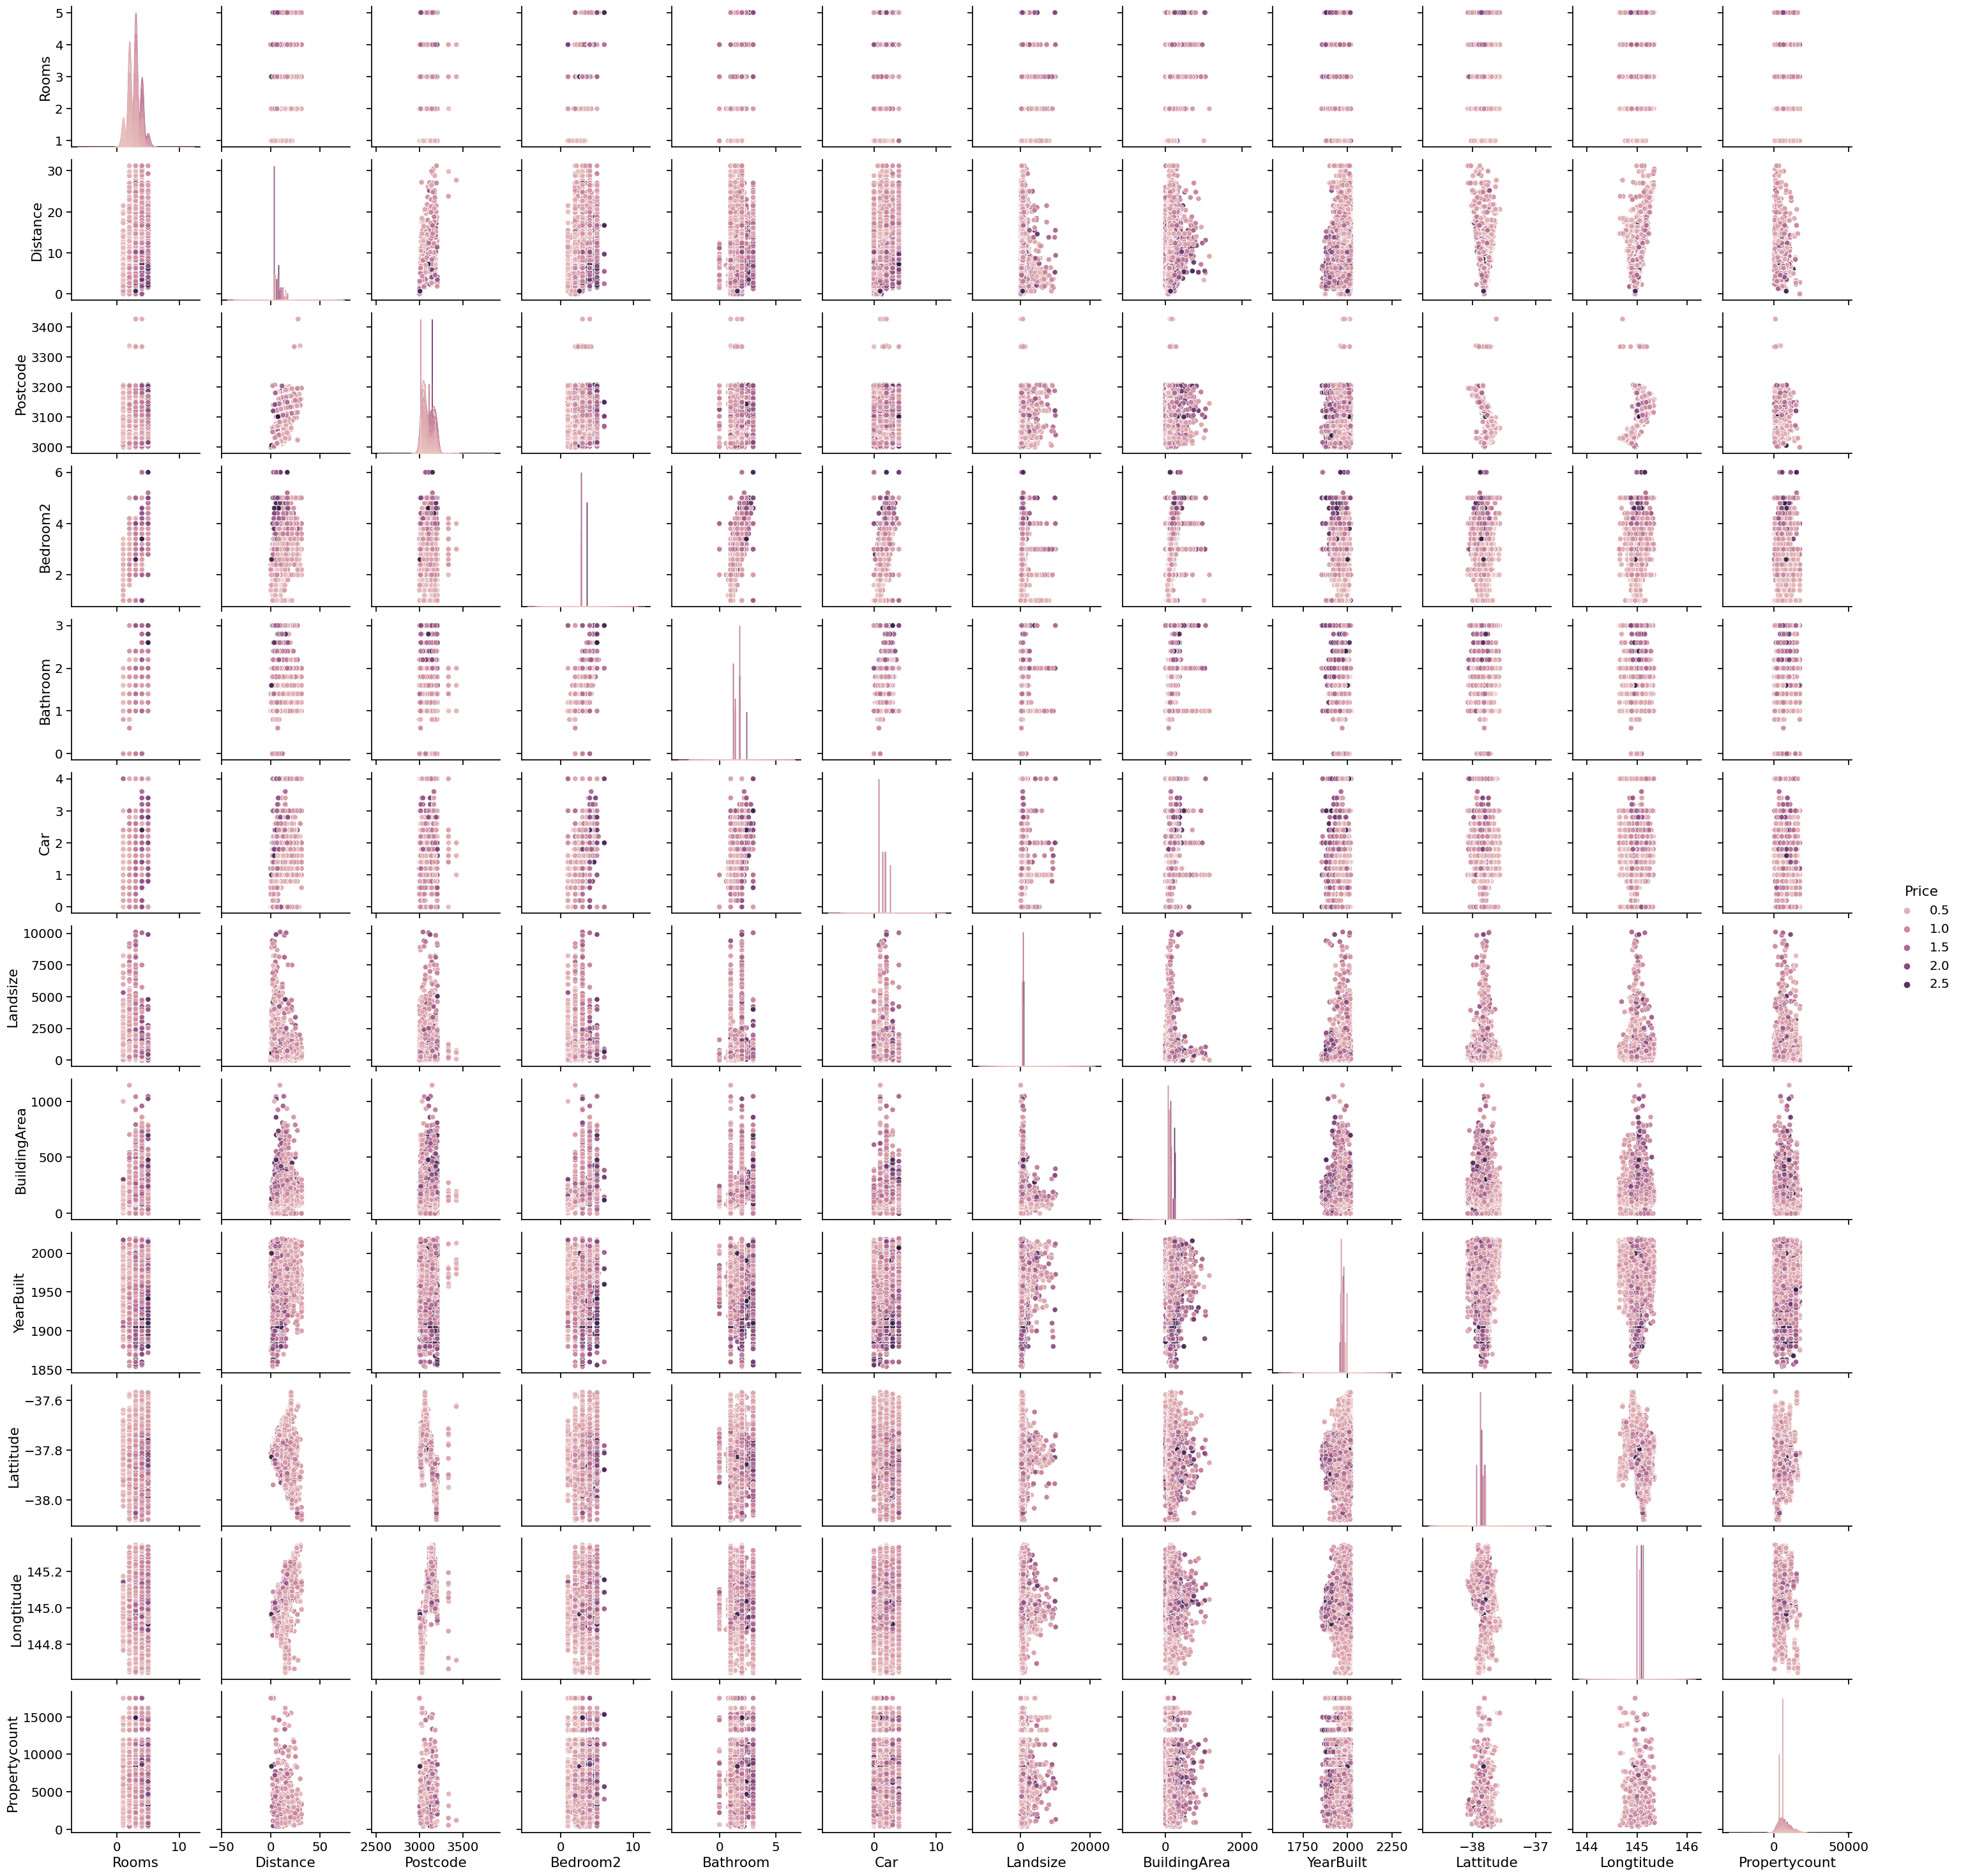

In [219]:
sns.pairplot(cleaned_data[num_col.columns], hue="Price")

C:\Users\90546\AppData\Local\Temp\ipykernel_21916\204258964.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cleaned_data.corr(), annot=True, linewidth =2, cmap='mako')


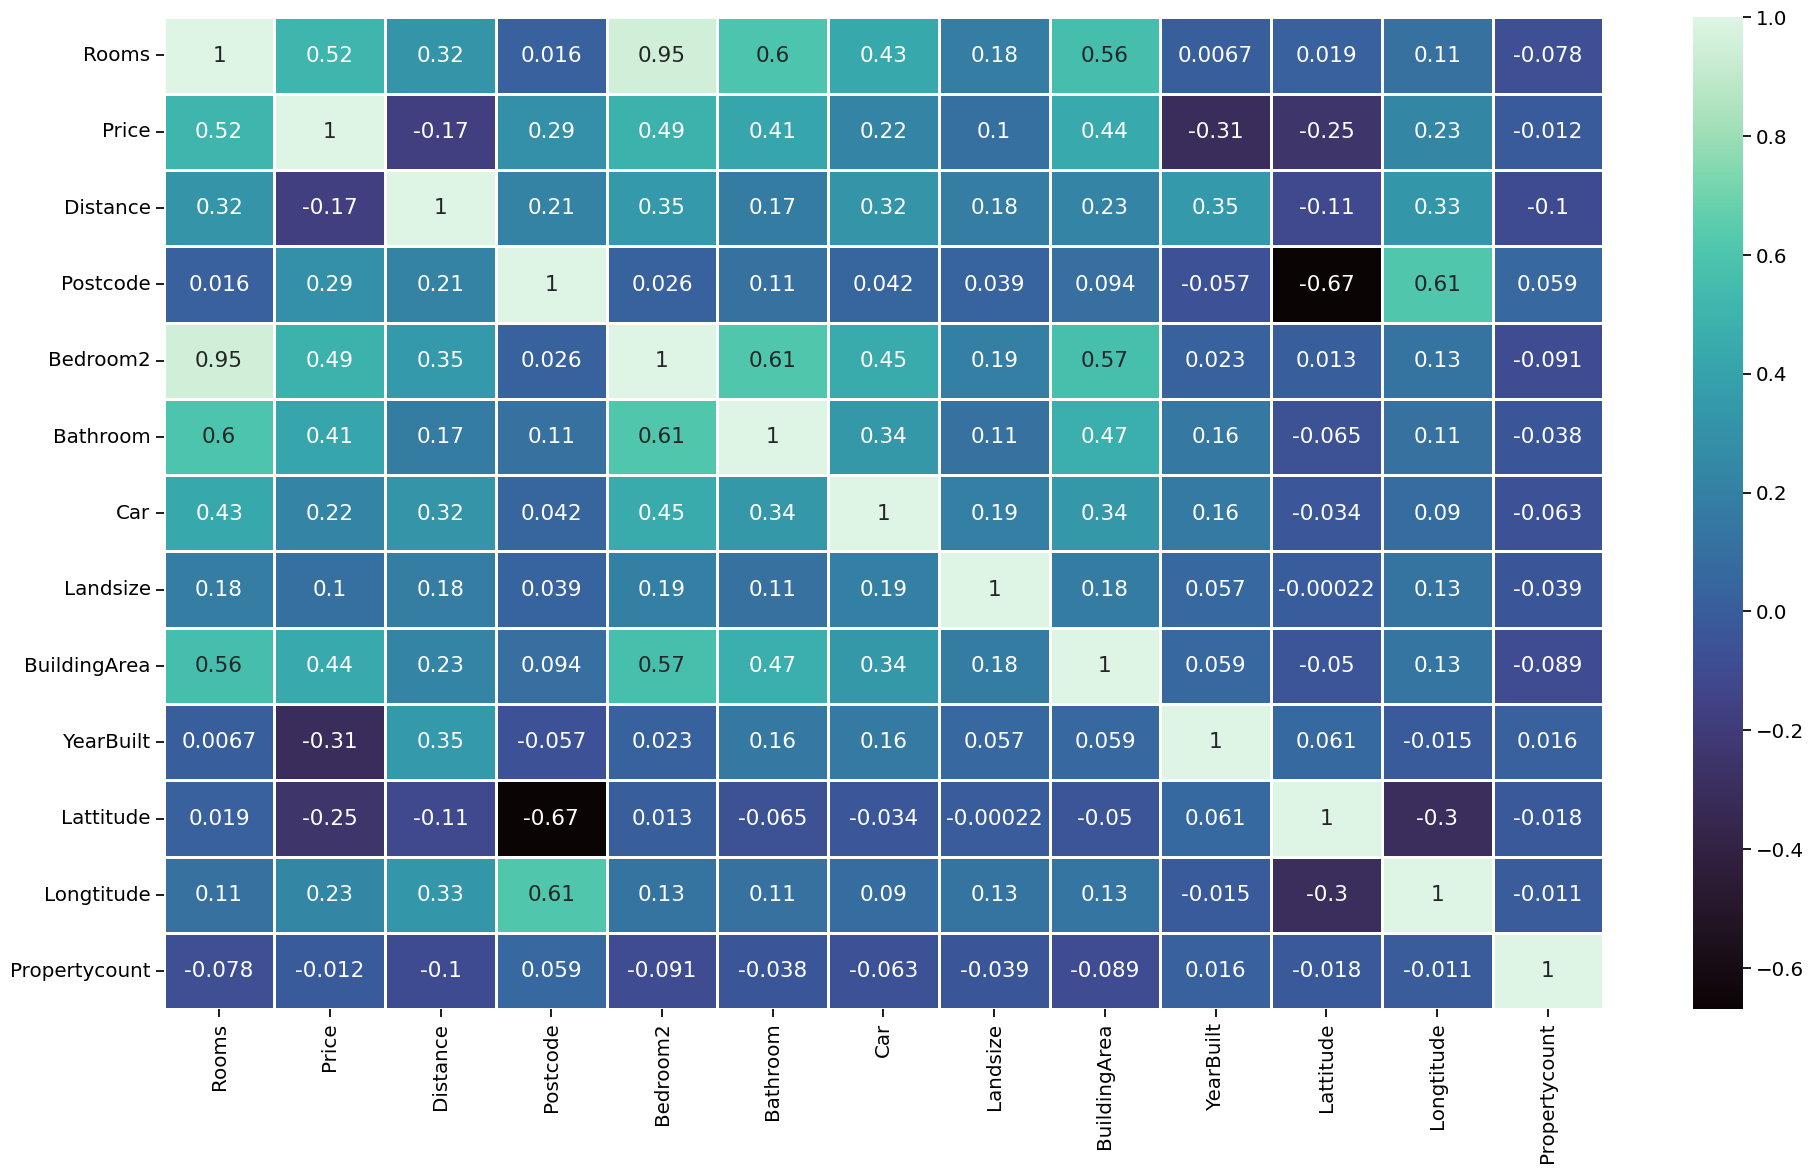

In [220]:
plt.figure(figsize=(20,12))
sns.set_context('notebook', font_scale = 1.3)
sns.heatmap(cleaned_data.corr(), annot=True, linewidth =2, cmap='mako')
plt.tight_layout()

In [221]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from category_encoders.target_encoder import TargetEncoder

In [222]:
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()
target_encoder = TargetEncoder()


In [228]:
cleaned_data['Suburb'] = target_encoder.fit_transform(cleaned_data['Suburb'], cleaned_data["Price"]) # Çok fazla unique değer olan sütunlarda target encoder kullandım
cleaned_data["SellerG"] = target_encoder.fit_transform(cleaned_data["SellerG"], cleaned_data["Price"])
cleaned_data["Type"] = label_encoder.fit_transform(cleaned_data["Type"])
cleaned_data["CouncilArea"] = label_encoder.fit_transform(cleaned_data["CouncilArea"])

data_encoded = pd.get_dummies(cleaned_data, columns=['Regionname', 'Method'])

C:\Users\90546\AppData\Local\Temp\ipykernel_21916\536935301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Suburb'] = target_encoder.fit_transform(cleaned_data['Suburb'], cleaned_data["Price"]) # Çok fazla unique değer olan sütunlarda target encoder kullandım
C:\Users\90546\AppData\Local\Temp\ipykernel_21916\536935301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["SellerG"] = target_encoder.fit_transform(cleaned_data["SellerG"], cleaned_data["Price"])
C:\Users\90546\App

# 6. Model Selection

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [230]:
X = data_encoded.drop(columns=["Price", "Address", "Date"]) # Adresleri içeren sütun neredeyse satır sayısı kadar farklı değerden oluştuğu için eğitime almadım
y = data_encoded["Price"]

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [233]:
models = {
'Lasso': {
'model': Lasso()
},
'LinearRegression': {
'model': LinearRegression()
},
'Ridge': {
'model': Ridge()
},
'ElasticNet': {
'model': ElasticNet()
},
'KNeighborsRegressor': {
'model': KNeighborsRegressor()
},
'RandomForestRegressor': {
'model': RandomForestRegressor()
},
'GradientBoostingRegressor': {
'model': GradientBoostingRegressor()
},
'AdaBoostRegressor': {
'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
}}

In [234]:
for model_name, model in models.items():
    model["model"].fit(X_train, y_train)
    y_pred = model["model"].predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{model_name} MAE: {mae} MSE:{mse} RMSE:{rmse} R2:{r2}")

c:\Users\90546\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.068e+14, tolerance: 6.381e+11
  model = cd_fast.enet_coordinate_descent(


Lasso MAE: 197536.81391042727 MSE:73462451142.22508 RMSE:271039.57486357057 R2:0.7158624826967399
LinearRegression MAE: 197537.388950625 MSE:73462678038.4281 RMSE:271039.9934298038 R2:0.7158616051093083
Ridge MAE: 197527.37365394272 MSE:73457984088.34346 RMSE:271031.3341448613 R2:0.7158797603342247
ElasticNet MAE: 201553.07465355928 MSE:78609870748.07646 RMSE:280374.51872107864 R2:0.6959533317688303
KNeighborsRegressor MAE: 245867.3621477363 MSE:123196247491.00647 RMSE:350993.22997887933 R2:0.5235024783558792
RandomForestRegressor MAE: 149723.60478892384 MSE:50475380582.87235 RMSE:224667.2663804684 R2:0.8047717017229908
GradientBoostingRegressor MAE: 166393.42768038166 MSE:57989657587.688614 RMSE:240810.41835370954 R2:0.7757080375070516
AdaBoostRegressor MAE: 227654.12633122725 MSE:89474075688.51878 RMSE:299122.1751868604 R2:0.6539328414196215


Modellerimizin performans metriklerine bakarsak en iyi sonucu veren model random forrest regressor modelidir. Daha başarılı modeller için özelliklerden bazılarını elemek yeni özellikler oluşturmak gibi teknikler kullanılabilir. Veri setindeki null değerler için daha farklı imputasyon teknikleri denenebilir.